In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/used-car-dataset/used_car_dataset.csv


Load the dataset and look at the first few rows of data.

In [2]:
df = pd.read_csv('/kaggle/input/used-car-dataset/used_car_dataset.csv')
df.head()

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice
0,Honda,City,2001,23,"98,000 km",Manual,second,Petrol,Nov-24,"Honda City v teck in mint condition, valid gen...","₹ 1,95,000"
1,Toyota,Innova,2009,15,190000.0 km,Manual,second,Diesel,Jul-24,"Toyota Innova 2.5 G (Diesel) 7 Seater, 2009, D...","₹ 3,75,000"
2,Volkswagen,VentoTest,2010,14,"77,246 km",Manual,first,Diesel,Nov-24,"Volkswagen Vento 2010-2013 Diesel Breeze, 2010...","₹ 1,84,999"
3,Maruti Suzuki,Swift,2017,7,"83,500 km",Manual,second,Diesel,Nov-24,Maruti Suzuki Swift 2017 Diesel Good Condition,"₹ 5,65,000"
4,Maruti Suzuki,Baleno,2019,5,"45,000 km",Automatic,first,Petrol,Nov-24,"Maruti Suzuki Baleno Alpha CVT, 2019, Petrol","₹ 6,85,000"


Let's see the total number of rows and columns.

In [3]:
df.shape

(9582, 11)

Let's see if we have any missing values in this table.

In [4]:
df.info()       # Information about columns, data types, and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         9582 non-null   object
 1   model         9582 non-null   object
 2   Year          9582 non-null   int64 
 3   Age           9582 non-null   int64 
 4   kmDriven      9535 non-null   object
 5   Transmission  9582 non-null   object
 6   Owner         9582 non-null   object
 7   FuelType      9582 non-null   object
 8   PostedDate    9582 non-null   object
 9   AdditionInfo  9582 non-null   object
 10  AskPrice      9582 non-null   object
dtypes: int64(2), object(9)
memory usage: 823.6+ KB


All of the features except 'kmDriven' are complete.

In [5]:
# Count missing values in 'kmDriven'
missing_values = df.kmDriven.isna().sum()

# Display the result
print(f'The kmDriven feature is missing {missing_values} values')

The kmDriven feature is missing 47 values


Let's see the rows with missing kmDriven and see if we can spot any similarities between the entries.

In [6]:
# Show rows where column kmDriven has missing values
rows_with_missing = df[df['kmDriven'].isna()]

# Display the result
print(rows_with_missing)

              Brand              model  Year  Age kmDriven Transmission  \
231   Maruti Suzuki           Alto-800  2019    5      NaN       Manual   
353          Toyota             Innova  2016    8      NaN       Manual   
444           Honda            City ZX  2024    0      NaN    Automatic   
476         Hyundai        Santro Xing  2010   14      NaN    Automatic   
608          Toyota              Etios  2012   12      NaN       Manual   
793           Skoda             Kushaq  2010   14      NaN    Automatic   
976        Mahindra    Bolero Neo Plus  2015    9      NaN    Automatic   
1164       Mahindra         Bolero Neo  2023    1      NaN       Manual   
1199           Tata             Indica  2014   10      NaN       Manual   
1413        Hyundai        Santro Xing  2007   17      NaN       Manual   
1978           Tata          Tiago Nrg  2021    3      NaN    Automatic   
2680  Maruti Suzuki         Zen-Estilo  2008   16      NaN    Automatic   
2847  Maruti Suzuki      

I'm seeing a lot of 'Maruti Suzuki' entries. I wonder how common this Brand is in India? There are a few rows with this value for Brand in the rows with missing prices. Let's see how many rows have 'Maruti Suzuki' as the Brand in the whole dataset.

In [7]:
# Count rows where model has the value "Maruti Suzuki"
rows_count = (df['Brand'] == 'Maruti Suzuki').sum()
rows_count

2720

OK! That's a lot more than I expected. I don't think we need to worry too much about the large representation of 'Maruti Suzuki' branded cars in the rows with missing prices.

Next, let's remove the rows with missing 'kmDriven' values. We will also clean up the 'kmDriven' and convert it to an integer datatype.

In [8]:
#  Clean up the kmDriven text
df["kmDriven"] = (
    df["kmDriven"]
    .str.replace(",", "", regex=False)
    .str.replace(" km", "", regex=False)
    .astype(float)  # Convert to float
)

# Drop rows with NaN in kmDriven
df = df.dropna(subset=["kmDriven"])

# Convert to integer
df["kmDriven"] = df["kmDriven"].astype(int)

Let's also clean up AskPrice.

In [9]:
#  Clean up the AskPrice text
df["AskPrice"] = (
    df["AskPrice"]
    .str.replace(",", "", regex=False)
    .str.replace("₹", "", regex=False)
    .astype(float)  # Convert to float
)

# Convert to integer
df["AskPrice"] = df["AskPrice"].astype(int)

Let's verify that 'kmDriven' and 'AskPrice' are integers now.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9535 entries, 0 to 9581
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         9535 non-null   object
 1   model         9535 non-null   object
 2   Year          9535 non-null   int64 
 3   Age           9535 non-null   int64 
 4   kmDriven      9535 non-null   int64 
 5   Transmission  9535 non-null   object
 6   Owner         9535 non-null   object
 7   FuelType      9535 non-null   object
 8   PostedDate    9535 non-null   object
 9   AdditionInfo  9535 non-null   object
 10  AskPrice      9535 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 893.9+ KB


Indeed they are.
Are the rows with missing values gone?

In [11]:
df.info()       

<class 'pandas.core.frame.DataFrame'>
Index: 9535 entries, 0 to 9581
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         9535 non-null   object
 1   model         9535 non-null   object
 2   Year          9535 non-null   int64 
 3   Age           9535 non-null   int64 
 4   kmDriven      9535 non-null   int64 
 5   Transmission  9535 non-null   object
 6   Owner         9535 non-null   object
 7   FuelType      9535 non-null   object
 8   PostedDate    9535 non-null   object
 9   AdditionInfo  9535 non-null   object
 10  AskPrice      9535 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 893.9+ KB


Yes they are! The dataset has no missing values now.

Now we need to look at some of these features and determine the categorical data in them, and how we will need to encode them.

Here are the unique values in each feature. This should give us an indication of which features are categorical.

In [12]:
unique_counts = df.nunique(dropna=False)

# Display the result
print(unique_counts)

Brand             38
model            398
Year              32
Age               32
kmDriven        1745
Transmission       2
Owner              2
FuelType           3
PostedDate        12
AdditionInfo    7270
AskPrice        1326
dtype: int64


It looks like we need to consider the features "Brand", "Model", "Transmission", "Owner", and "FuelType" for encoding.

Let's start by ensuring there are no accidental duplicate entries in "Brand" due to typos.

In [13]:
# Show unique values of Brand
unique_brands = sorted(df["Brand"].unique())

# Display the result
print(unique_brands)

['Ambassador', 'Ashok', 'Aston Martin', 'Audi', 'BMW', 'Bajaj', 'Bentley', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Land Rover', 'Lexus', 'MG', 'Mahindra', 'Maruti Suzuki', 'Maserati', 'Mercedes-Benz', 'Mini', 'Mitsubishi', 'Nissan', 'Opel', 'Porsche', 'Renault', 'Rolls-Royce', 'Skoda', 'Ssangyong', 'Tata', 'Toyota', 'Volkswagen', 'Volvo']


Good. They are all unique brands.

Let's check for typos in Year and Age.

In [14]:
# Show unique values of Year
unique_years = sorted(df["Year"].unique())

# Display the result
print(unique_years)

[1986, 1990, 1994, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]


In [15]:
# Show unique values of Age
unique_ages = sorted(df["Age"].unique())

# Display the result
print(unique_ages)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 34, 38]


No typos.

Now let's check the unique values of Transmission, Owners, and FuelType.

In [16]:
# Show unique values of Transmission
unique_transmissions = sorted(df["Transmission"].unique())

# Display the result
print(unique_transmissions)

['Automatic', 'Manual']


In [17]:
# Show unique values of Owner
unique_owners = sorted(df["Owner"].unique())

# Display the result
print(unique_owners)

['first', 'second']


In [18]:
# Show unique values of FuelType
unique_fuel_types = sorted(df["FuelType"].unique())

# Display the result
print(unique_fuel_types)

['Diesel', 'Hybrid/CNG', 'Petrol']


These are indeed are categorical features.

**Columns to be dropped from the dataset:**
* AdditionalInfo - Despite the high score, this contains redundant information found elsewhere in the dataset.
* Age - Essentially contains the same information as 'Year'.
* PostedDate - Has insignificant contributions to the target.

In [19]:
df = df.drop(columns=['AdditionInfo', 'PostedDate', 'Age'])

BoxPlot for Asking Price

**Columns needing more research:**
* Transmission
* FuelType
* Owner

Let's plot the average AskPrice by Transmission type.

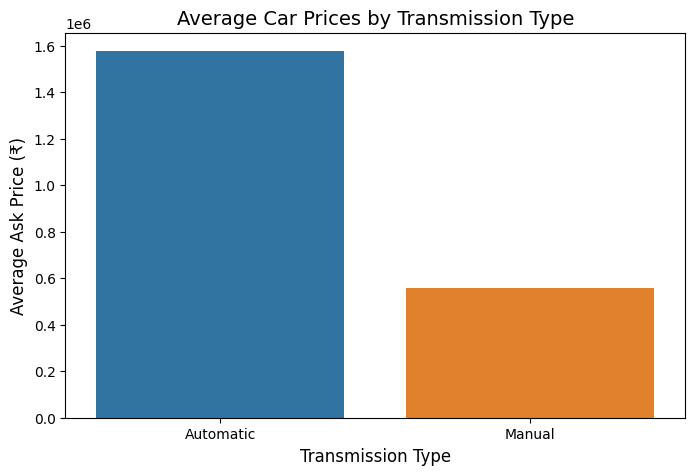

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by transmission type and calculate average price
price_trends_by_transmission = (
    df.groupby('Transmission')['AskPrice']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Create a bar plot for price trends by transmission
plt.figure(figsize=(8, 5))
sns.barplot(
    data=price_trends_by_transmission, 
    x='Transmission', 
    y='AskPrice'
)
plt.title('Average Car Prices by Transmission Type', fontsize=14)
plt.xlabel('Transmission Type', fontsize=12)
plt.ylabel('Average Ask Price (₹)', fontsize=12)

plt.show()

Wow! There is a BIG difference between Automatic and Manual Transmission types. We will keep this feature.

What about the Owner feature?

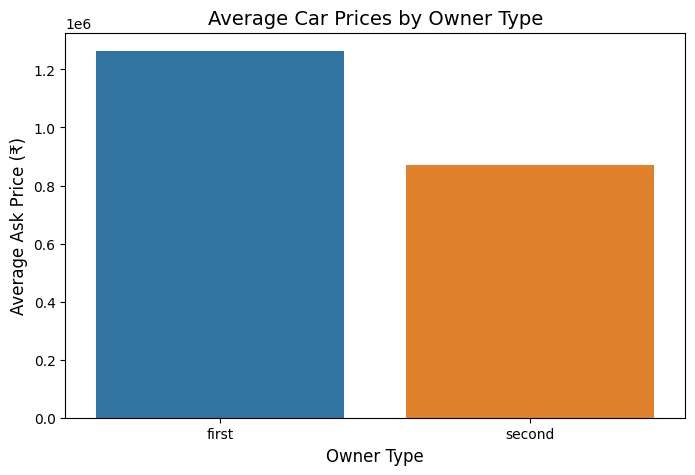

In [21]:
# Group by owner type and calculate average price
price_trends_by_owner = (
    df.groupby('Owner')['AskPrice']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Create a bar plot for price trends by owner
plt.figure(figsize=(8, 5))
sns.barplot(
    data=price_trends_by_owner, 
    x='Owner', 
    y='AskPrice'
)
plt.title('Average Car Prices by Owner Type', fontsize=14)
plt.xlabel('Owner Type', fontsize=12)
plt.ylabel('Average Ask Price (₹)', fontsize=12)

plt.show()

There is a significant difference in the AskPrice for first and second owners. We will also keep this feature.  

Last, let's examine FuelType.

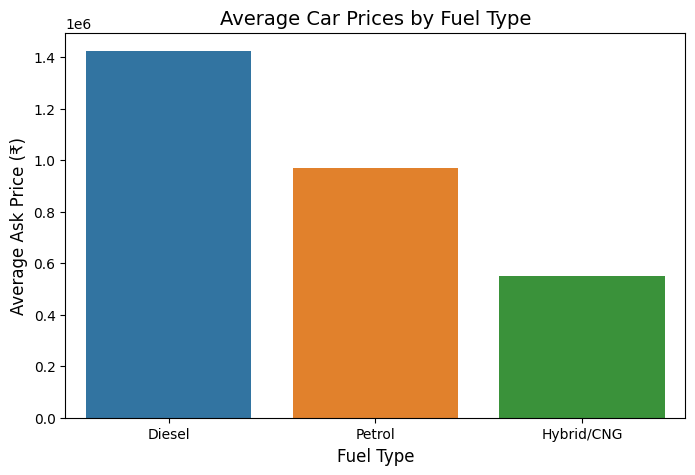

In [22]:
# Group by fuel type and calculate average price
price_trends_by_fuel_type = (
    df.groupby('FuelType')['AskPrice']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Create a bar plot for price trends by fuel type
plt.figure(figsize=(8, 5))
sns.barplot(
    data=price_trends_by_fuel_type, 
    x='FuelType', 
    y='AskPrice'
)
plt.title('Average Car Prices by Fuel Type', fontsize=14)
plt.xlabel('Fuel Type', fontsize=12)
plt.ylabel('Average Ask Price (₹)', fontsize=12)

plt.show()

There is a large difference between average asking prices for these three FuelTypes, si we will keep this feature. Surprisingly, Hybrid/CNG is lowest average AskPrice even as Hybrid cars are quite expensive. However, Compressed Natural Gas (CNG) vehicles can be quite inexpensive, and appear to make up a more significant portion of the dataset than more expensive Hybrid cards.

Just for fun, let's see the average asking price for each Brand.

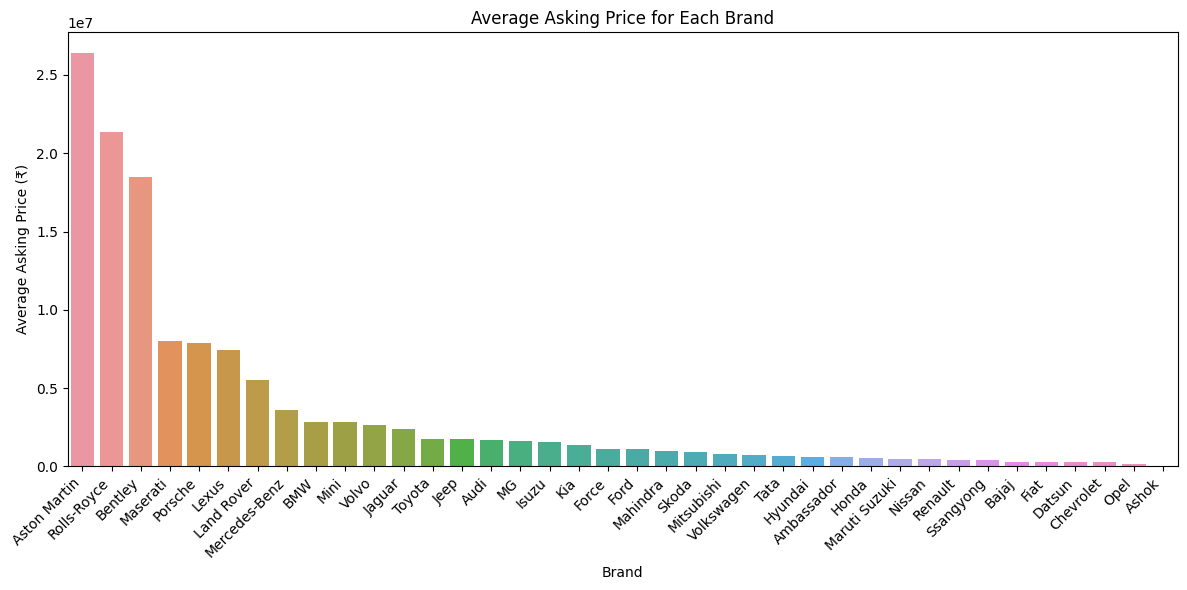

In [23]:
# Calculate the average asking price for each brand
brand_avg_price_summary = df.groupby('Brand')['AskPrice'].mean().reset_index()

# Sort the data for better visualization
brand_avg_price_summary = brand_avg_price_summary.sort_values(by='AskPrice', ascending=False)

# Create a seaborn bar plot for the average asking price by brand
plt.figure(figsize=(12, 6))
sns.barplot(data=brand_avg_price_summary, x='Brand', y='AskPrice')
plt.title('Average Asking Price for Each Brand')
plt.xlabel('Brand')
plt.ylabel('Average Asking Price (₹)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

We can see that a vast majority of car brands have an average AskPrice that is relatively low. Only a few brands have large AskPrices.

Now let's look at the total AskPrice for each Brand.

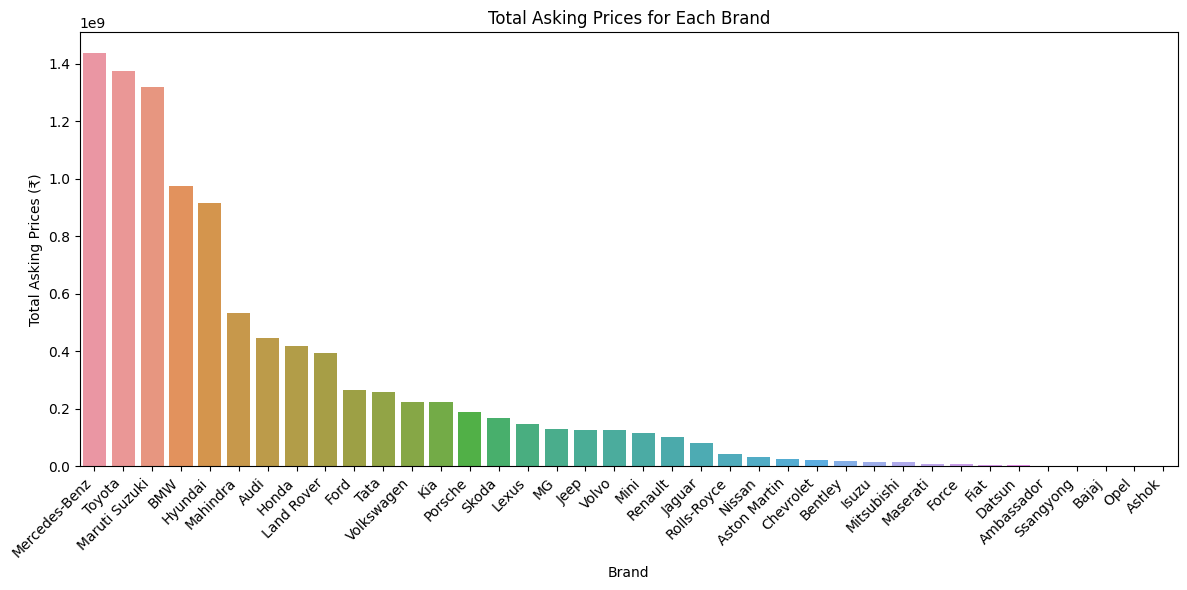

In [24]:
# Recalculate the total AskPrice by Brand
brand_price_summary = df.groupby('Brand')['AskPrice'].sum().reset_index()

# Sort the data for better visualization
brand_price_summary = brand_price_summary.sort_values(by='AskPrice', ascending=False)

# Create a seaborn bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=brand_price_summary, x='Brand', y='AskPrice')
plt.title('Total Asking Prices for Each Brand')
plt.xlabel('Brand')
plt.ylabel('Total Asking Prices (₹)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Now let's look at the total units sold of each Brand.

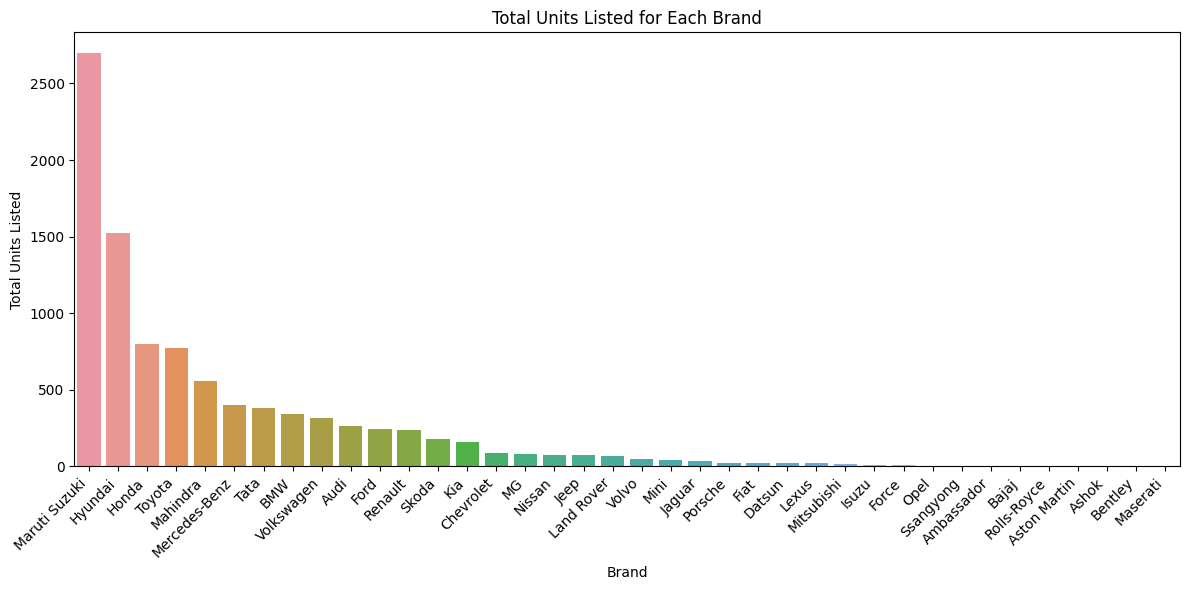

In [25]:
# Count the total units sold (assuming each row represents one unit sold)
brand_units_summary = df['Brand'].value_counts().reset_index()
brand_units_summary.columns = ['Brand', 'TotalUnitsSold']

# Sort the data for better visualization
brand_units_summary = brand_units_summary.sort_values(by='TotalUnitsSold', ascending=False)

# Create a seaborn bar plot for total units sold by brand
plt.figure(figsize=(12, 6))
sns.barplot(data=brand_units_summary, x='Brand', y='TotalUnitsSold')
plt.title('Total Units Listed for Each Brand')
plt.xlabel('Brand')
plt.ylabel('Total Units Listed')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Let's look at a few scatter plots to check and see if this data is linear. We can also check visually for outliers at the same time.

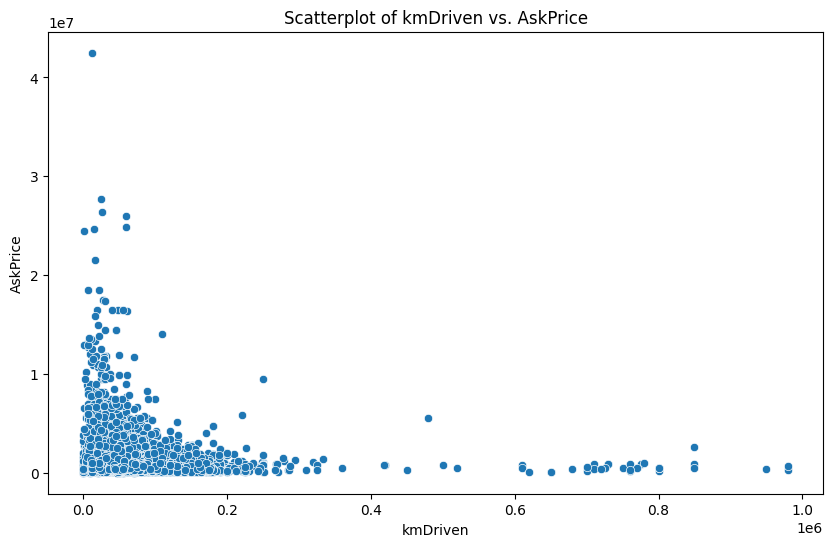

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplot to identify outliers in 'kmDriven' vs. 'AskPrice'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['kmDriven'], y=df['AskPrice'])
plt.title('Scatterplot of kmDriven vs. AskPrice')
plt.show()

I would like to remove some outliers.

In [27]:
# Remove cars with kmDriven > 400,000
df = df[df['kmDriven'] <= 400000]
df = df[df['AskPrice'] <= 0.2e7]

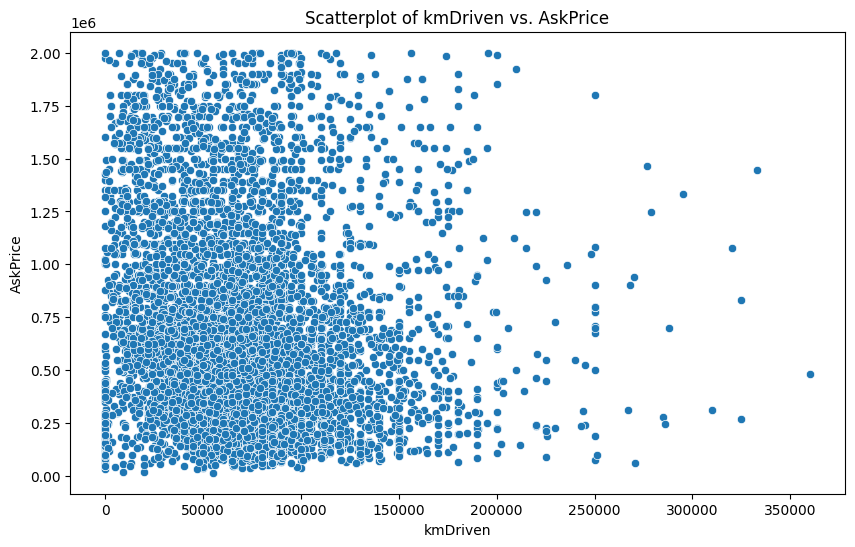

In [28]:
# Scatterplot to identify outliers in 'kmDriven' vs. 'AskPrice'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['kmDriven'], y=df['AskPrice'])
plt.title('Scatterplot of kmDriven vs. AskPrice')
plt.show()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8470 entries, 0 to 9581
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         8470 non-null   object
 1   model         8470 non-null   object
 2   Year          8470 non-null   int64 
 3   kmDriven      8470 non-null   int64 
 4   Transmission  8470 non-null   object
 5   Owner         8470 non-null   object
 6   FuelType      8470 non-null   object
 7   AskPrice      8470 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 595.5+ KB


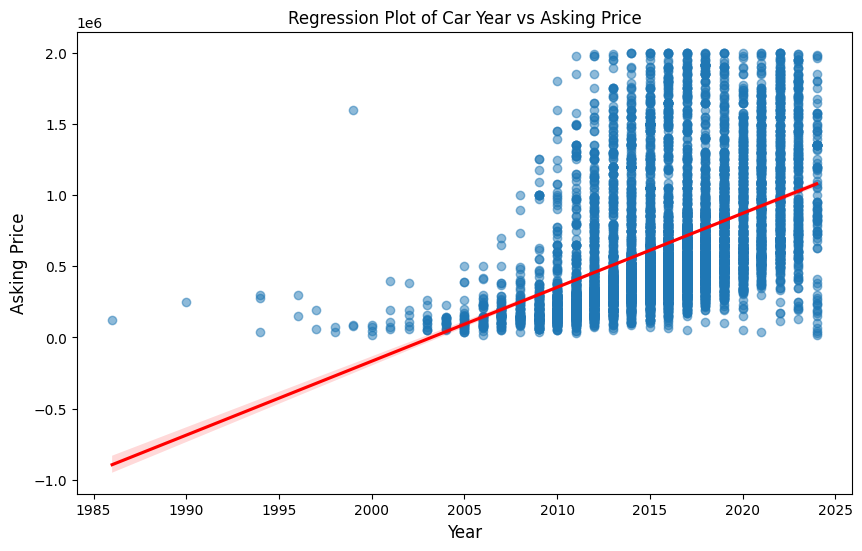

In [30]:
# Regression plot with a linear regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Year', y='AskPrice', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Regression Plot of Car Year vs Asking Price')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Asking Price', fontsize=12)
plt.show()

Use PairPlot to see relationships between the numerical features and the Asking Price.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


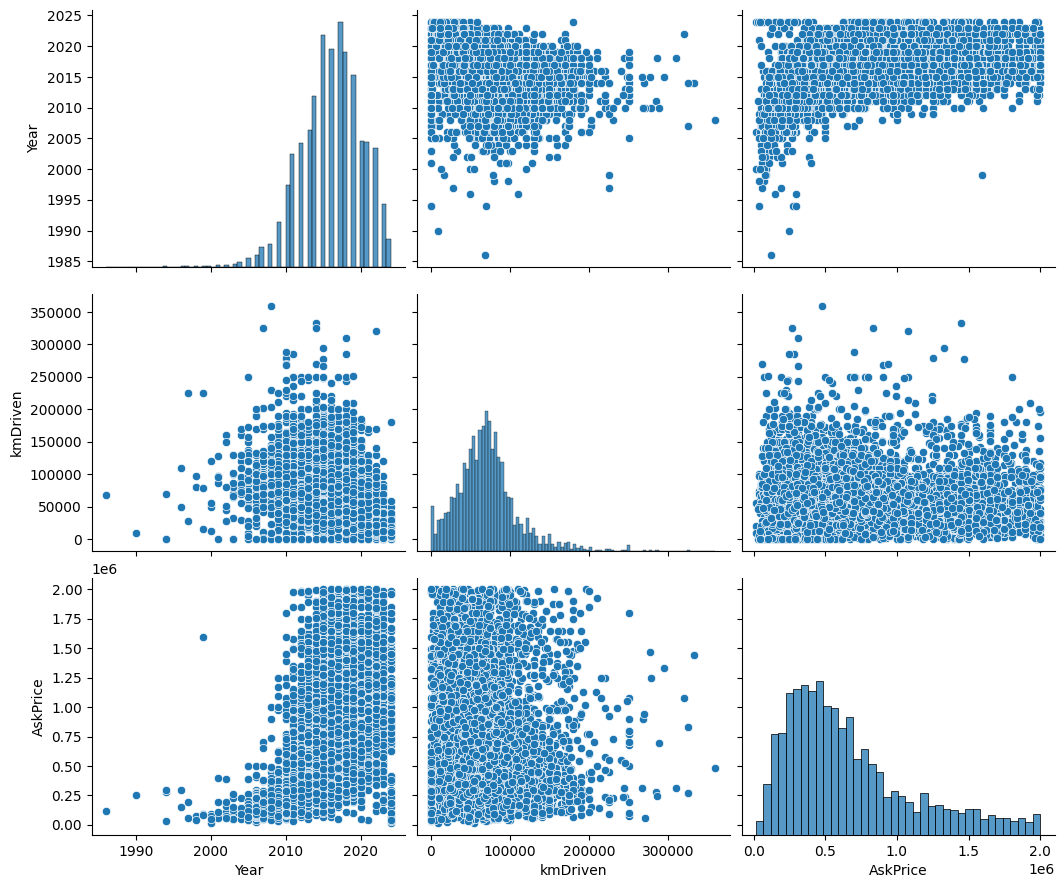

In [31]:
# Select numerical features for pairplot
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Pairplot of numerical features including the target
sns.pairplot(df, vars=numerical_features, y_vars=['AskPrice'], height=3, aspect=1.2)
plt.show()

Now we need to encode some of the features. First, we separate numerical and categorical columns.

The 'model' and 'Brand' features have very high cardinality in a relatively small dataset. For this reasons, we will use Target Encoding on these features.

In [32]:
# Define a function for target encoding with smoothing
def target_encode(data, feature, target, smoothing=10):
    # Calculate global mean of the target
    global_mean = data[target].mean()
    
    # Calculate the mean and count for each category
    agg = data.groupby(feature)[target].agg(['mean', 'count'])
    mean = agg['mean']
    count = agg['count']
    
    # Apply smoothing formula
    smoothed_mean = (count * mean + smoothing * global_mean) / (count + smoothing)
    
    # Map the smoothed means back to the original feature
    encoded_feature = data[feature].map(smoothed_mean)
    return encoded_feature

# Ensure 'AskPrice' is numeric
df['AskPrice'] = df['AskPrice'].astype(float)

# Apply target encoding to the 'model' feature
df['model_encoded'] = target_encode(df, feature='model', target='AskPrice', smoothing=10)

# Apply target encoding to the 'Brand' feature
df['Brand_encoded'] = target_encode(df, feature='Brand', target='AskPrice', smoothing=10)

# Display the dataset with the new encoded feature
df[['model', 'model_encoded', 'Brand', 'Brand_encoded']].head()

,model,model_encoded,Brand,Brand_encoded
0,City,556278.914903,Honda,5.255898e+05
1,Innova,769882.964398,Toyota,1.003624e+06
2,VentoTest,492348.521431,Volkswagen,6.815590e+05
3,Swift,485337.606211,Maruti Suzuki,4.849297e+05
4,Baleno,604684.889879,Maruti Suzuki,4.849297e+05


Remove the 'model' and 'Brand' columns.

In [33]:
df = df.drop(columns=['model', 'Brand'])

In [34]:
df.head()

,Year,kmDriven,Transmission,Owner,FuelType,AskPrice,model_encoded,Brand_encoded
0,2001,98000,Manual,second,Petrol,195000.0,556278.914903,5.255898e+05
1,2009,190000,Manual,second,Diesel,375000.0,769882.964398,1.003624e+06
2,2010,77246,Manual,first,Diesel,184999.0,492348.521431,6.815590e+05
3,2017,83500,Manual,second,Diesel,565000.0,485337.606211,4.849297e+05
4,2019,45000,Automatic,first,Petrol,685000.0,604684.889879,4.849297e+05


In [35]:
df.shape

(8470, 8)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8470 entries, 0 to 9581
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           8470 non-null   int64  
 1   kmDriven       8470 non-null   int64  
 2   Transmission   8470 non-null   object 
 3   Owner          8470 non-null   object 
 4   FuelType       8470 non-null   object 
 5   AskPrice       8470 non-null   float64
 6   model_encoded  8470 non-null   float64
 7   Brand_encoded  8470 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 595.5+ KB


In [37]:
# Reset index to sequential integers
df.reset_index(drop=True, inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8470 entries, 0 to 8469
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           8470 non-null   int64  
 1   kmDriven       8470 non-null   int64  
 2   Transmission   8470 non-null   object 
 3   Owner          8470 non-null   object 
 4   FuelType       8470 non-null   object 
 5   AskPrice       8470 non-null   float64
 6   model_encoded  8470 non-null   float64
 7   Brand_encoded  8470 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 529.5+ KB


Let's use PairPlot again to see if the encoded versions of 'model' and 'Brand' show more relationships between the numerical features.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

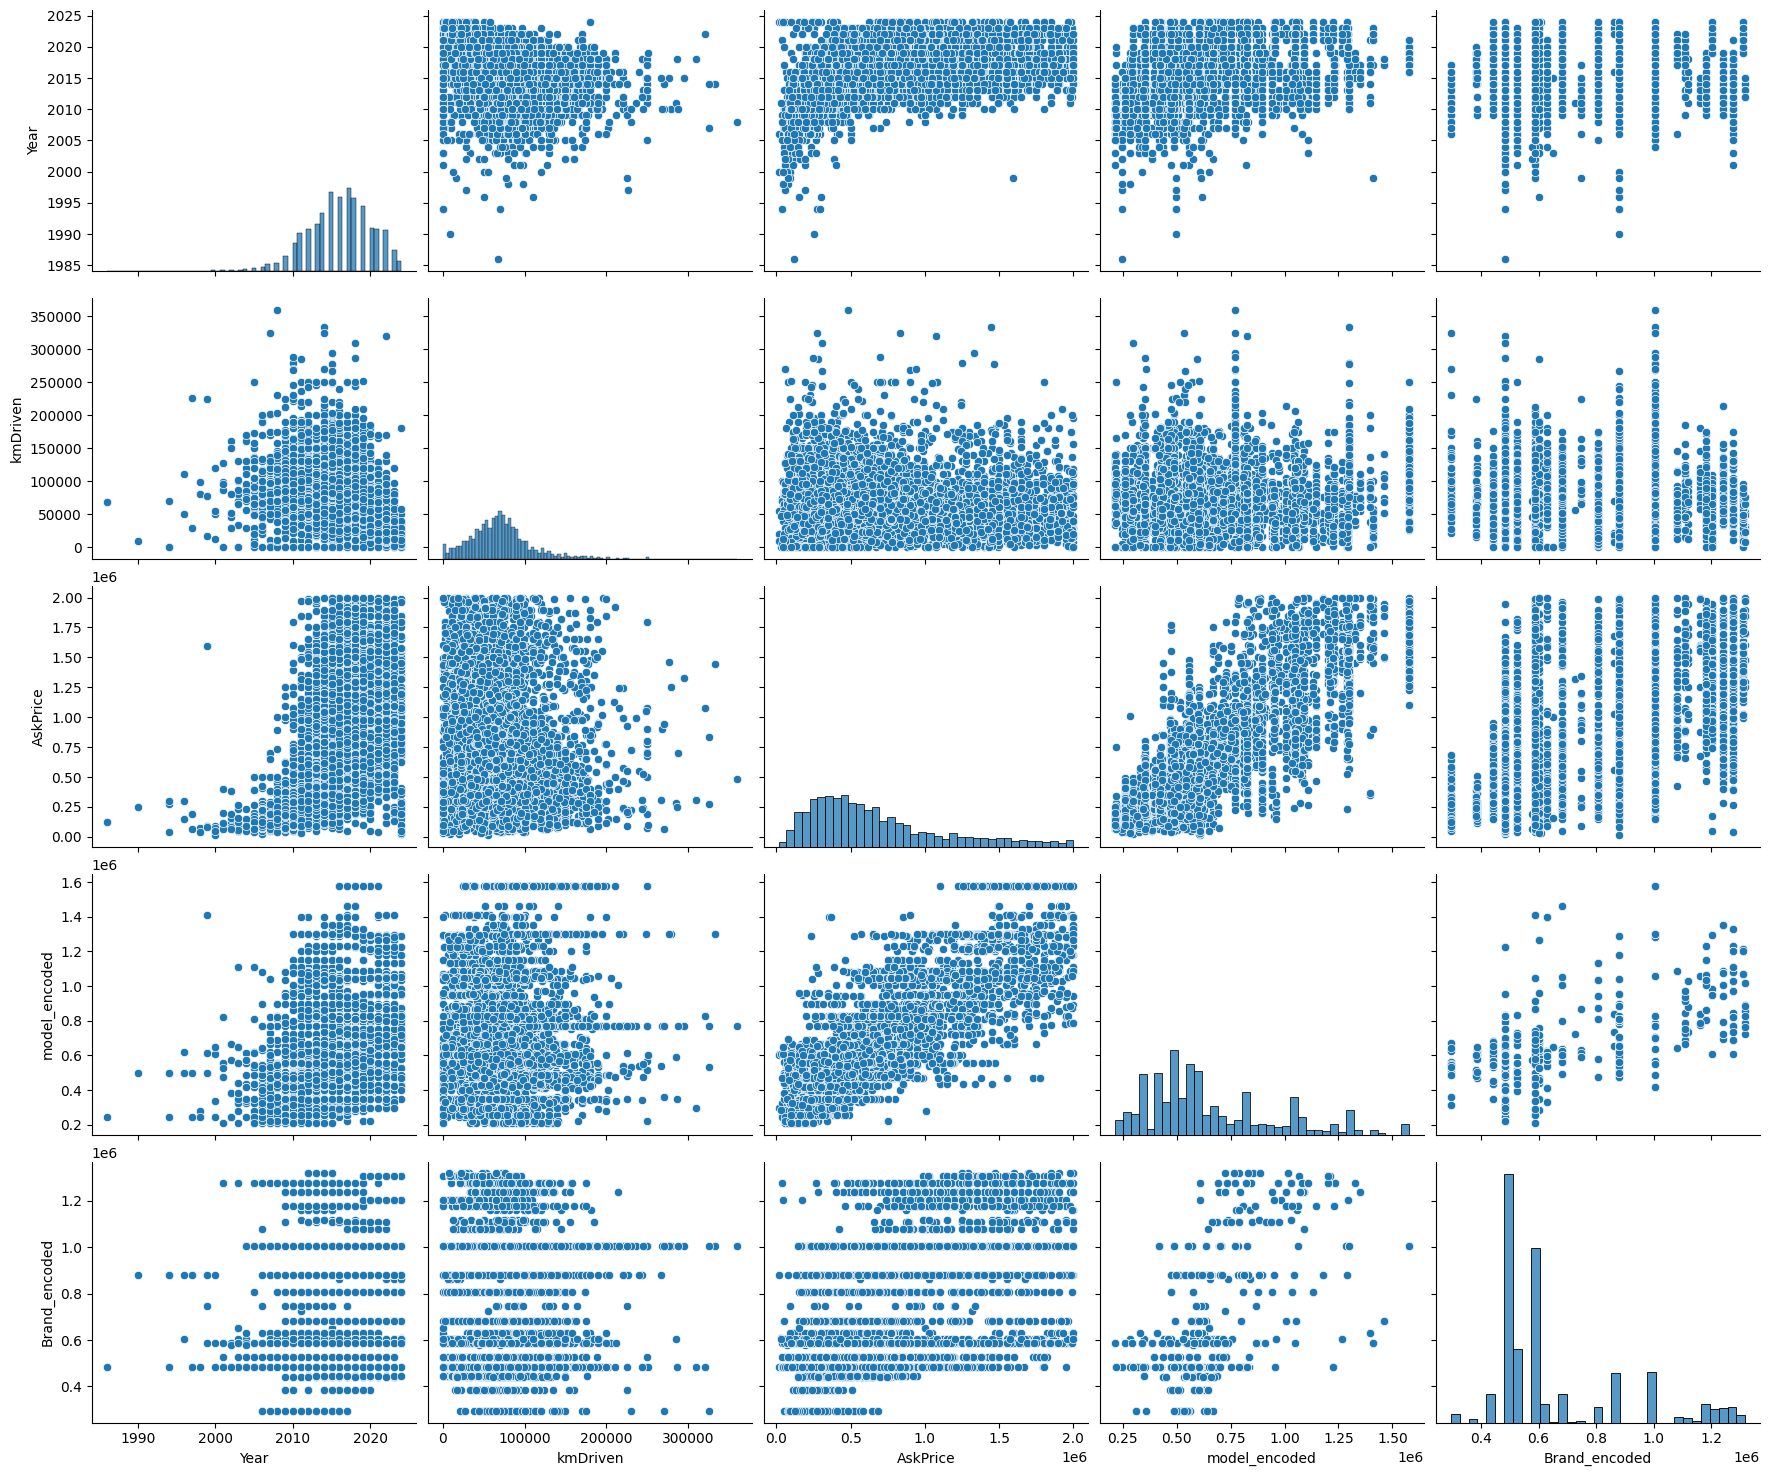

In [39]:
# Select numerical features for pairplot
pairplot_num_features = df.select_dtypes(include=['int64', 'float64']).columns

# Pairplot of numerical features including the target
sns.pairplot(df, vars=pairplot_num_features, y_vars=['AskPrice'], height=3, aspect=1.2)
plt.show()

**Feature Engineering**

Make some Interaction Features

Year * Brand_encoded

kmDriven / Year

In [40]:
# Create interaction features
df['km_per_year'] = df['kmDriven'] / (2025 - df['Year'])  
df['brand_model_interaction'] = df['Brand_encoded'] * df['model_encoded']

# Check correlation with the target
correlation = df[['km_per_year', 'brand_model_interaction', 'AskPrice']].corr()
print(correlation)

                         km_per_year  brand_model_interaction  AskPrice
km_per_year                 1.000000                 0.105375  0.208374
brand_model_interaction     0.105375                 1.000000  0.773005
AskPrice                    0.208374                 0.773005  1.000000


Define the numerical features.

In [41]:
numerical_features = ['Year', 'kmDriven', 'AskPrice', 'model_encoded',
                      'Brand_encoded', 'km_per_year', 'brand_model_interaction']  
categorical_features = ['Transmission', 'FuelType', 'Owner']

One-Hot encoding for low-cardinality categorical features.

In [42]:
from sklearn.preprocessing import OneHotEncoder

# Encode categorical features
encoder = OneHotEncoder(sparse_output=False)
df_encoded = encoder.fit_transform(df[categorical_features])

# Convert the encoded features back to a DataFrame
encoded_feature_names = encoder.get_feature_names_out(categorical_features)
df_encoded = pd.DataFrame(df_encoded, columns=encoded_feature_names)

# Combine numerical and encoded categorical features
# df_combined = pd.concat([df_scaled[numerical_features], df_encoded], axis=1)

In [43]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8470 entries, 0 to 8469
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Transmission_Automatic  8470 non-null   float64
 1   Transmission_Manual     8470 non-null   float64
 2   FuelType_Diesel         8470 non-null   float64
 3   FuelType_Hybrid/CNG     8470 non-null   float64
 4   FuelType_Petrol         8470 non-null   float64
 5   Owner_first             8470 non-null   float64
 6   Owner_second            8470 non-null   float64
dtypes: float64(7)
memory usage: 463.3 KB


In [44]:
df_encoded = df_encoded.reindex(df.index)

Combine dataframes.

In [45]:
# Combine the DataFrames using an inner join
df_combined = pd.concat([df, df_encoded], axis=1, join='inner')

Drop text-based columns.

In [46]:
df_combined.drop(columns=['Transmission', 'Owner', 'FuelType'], inplace=True)

Scale the Data

In [47]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features while preserving the index and column names
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_combined)

# Create a DataFrame with the original column names and index
df_final = pd.DataFrame(df_scaled, columns=df_combined.columns, index=df_combined.index)


In [48]:
df_final.head()

,Year,kmDriven,AskPrice,model_encoded,Brand_encoded,km_per_year,brand_model_interaction,Transmission_Automatic,Transmission_Manual,FuelType_Diesel,FuelType_Hybrid/CNG,FuelType_Petrol,Owner_first,Owner_second
0,-3.696495,0.714416,-1.057263,-0.334709,-0.552285,-0.837226,-0.484858,-0.893264,0.893264,-0.759597,-0.527722,1.184126,-0.972515,0.972515
1,-1.730308,3.095564,-0.653130,0.376397,1.405612,0.558943,0.742676,-0.893264,0.893264,1.316488,-0.527722,-0.844504,-0.972515,0.972515
2,-1.484535,0.177260,-1.079717,-0.547538,0.086523,-0.646140,-0.374474,-0.893264,0.893264,1.316488,-0.527722,-0.844504,1.028262,-1.028262
3,0.235879,0.339126,-0.226545,-0.570878,-0.718818,0.301361,-0.630588,-0.893264,0.893264,1.316488,-0.527722,-0.844504,-0.972515,0.972515
4,0.727425,-0.657332,0.042876,-0.173561,-0.718818,-0.225002,-0.482673,1.119490,-1.119490,-0.759597,-0.527722,1.184126,1.028262,-1.028262


In [49]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8470 entries, 0 to 8469
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     8470 non-null   float64
 1   kmDriven                 8470 non-null   float64
 2   AskPrice                 8470 non-null   float64
 3   model_encoded            8470 non-null   float64
 4   Brand_encoded            8470 non-null   float64
 5   km_per_year              8470 non-null   float64
 6   brand_model_interaction  8470 non-null   float64
 7   Transmission_Automatic   8470 non-null   float64
 8   Transmission_Manual      8470 non-null   float64
 9   FuelType_Diesel          8470 non-null   float64
 10  FuelType_Hybrid/CNG      8470 non-null   float64
 11  FuelType_Petrol          8470 non-null   float64
 12  Owner_first              8470 non-null   float64
 13  Owner_second             8470 non-null   float64
dtypes: float64(14)
memory us

Define the X and y variables.

In [50]:
df_final.columns

Index(['Year', 'kmDriven', 'AskPrice', 'model_encoded', 'Brand_encoded',
       'km_per_year', 'brand_model_interaction', 'Transmission_Automatic',
       'Transmission_Manual', 'FuelType_Diesel', 'FuelType_Hybrid/CNG',
       'FuelType_Petrol', 'Owner_first', 'Owner_second'],
      dtype='object')

In [51]:
df_final.head()

,Year,kmDriven,AskPrice,model_encoded,Brand_encoded,km_per_year,brand_model_interaction,Transmission_Automatic,Transmission_Manual,FuelType_Diesel,FuelType_Hybrid/CNG,FuelType_Petrol,Owner_first,Owner_second
0,-3.696495,0.714416,-1.057263,-0.334709,-0.552285,-0.837226,-0.484858,-0.893264,0.893264,-0.759597,-0.527722,1.184126,-0.972515,0.972515
1,-1.730308,3.095564,-0.653130,0.376397,1.405612,0.558943,0.742676,-0.893264,0.893264,1.316488,-0.527722,-0.844504,-0.972515,0.972515
2,-1.484535,0.177260,-1.079717,-0.547538,0.086523,-0.646140,-0.374474,-0.893264,0.893264,1.316488,-0.527722,-0.844504,1.028262,-1.028262
3,0.235879,0.339126,-0.226545,-0.570878,-0.718818,0.301361,-0.630588,-0.893264,0.893264,1.316488,-0.527722,-0.844504,-0.972515,0.972515
4,0.727425,-0.657332,0.042876,-0.173561,-0.718818,-0.225002,-0.482673,1.119490,-1.119490,-0.759597,-0.527722,1.184126,1.028262,-1.028262


Drop rows with low mutual information.

In [52]:
# Define the column names to drop
columns_to_drop = [
    'km_per_year',
    'brand_model_interaction'
]

# Drop columns by their names
df_final = df_final.drop(columns=columns_to_drop)

In [53]:
df_final.head()

,Year,kmDriven,AskPrice,model_encoded,Brand_encoded,Transmission_Automatic,Transmission_Manual,FuelType_Diesel,FuelType_Hybrid/CNG,FuelType_Petrol,Owner_first,Owner_second
0,-3.696495,0.714416,-1.057263,-0.334709,-0.552285,-0.893264,0.893264,-0.759597,-0.527722,1.184126,-0.972515,0.972515
1,-1.730308,3.095564,-0.653130,0.376397,1.405612,-0.893264,0.893264,1.316488,-0.527722,-0.844504,-0.972515,0.972515
2,-1.484535,0.177260,-1.079717,-0.547538,0.086523,-0.893264,0.893264,1.316488,-0.527722,-0.844504,1.028262,-1.028262
3,0.235879,0.339126,-0.226545,-0.570878,-0.718818,-0.893264,0.893264,1.316488,-0.527722,-0.844504,-0.972515,0.972515
4,0.727425,-0.657332,0.042876,-0.173561,-0.718818,1.119490,-1.119490,-0.759597,-0.527722,1.184126,1.028262,-1.028262


In [54]:
X = df_final.drop(columns=['AskPrice'])  # Replace 'AskPrice' with your target column
y = df_final['AskPrice']  # Replace 'AskPrice' with your target column

Now that we have X and y data, let's see the Mutual Information for the current features, including the encoded 'model' and 'Brand'.

In [55]:
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(X, y)

# Convert results to a Pandas Series
mutual_info_series = pd.Series(mutual_info, index=X.columns)
mutual_info_series.sort_values(ascending=False, inplace=True)


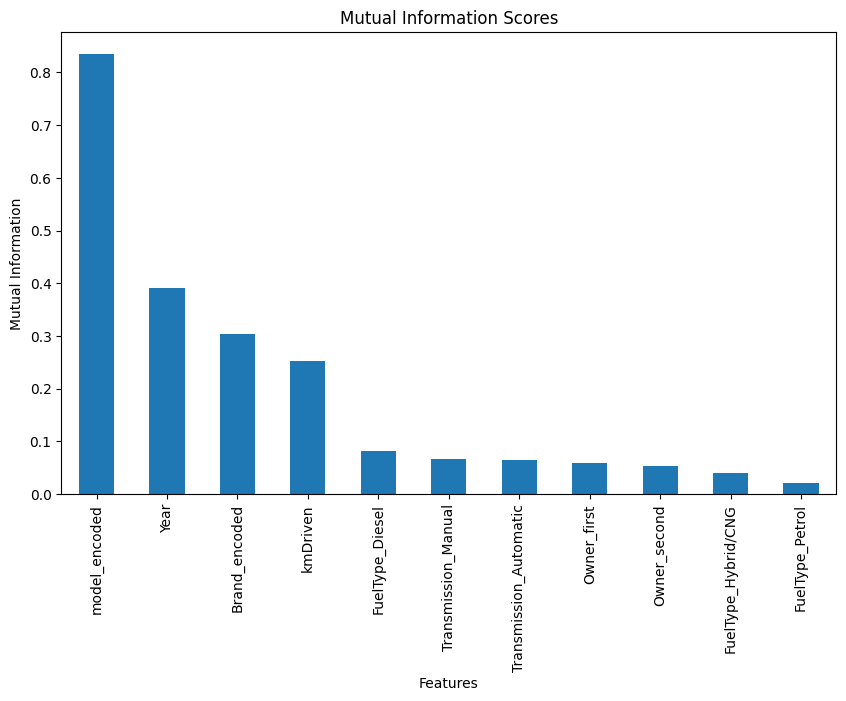

In [56]:
# Plot mutual information scores
plt.figure(figsize=(10, 6))
mutual_info_series.plot(kind='bar')
plt.title('Mutual Information Scores')
plt.xlabel('Features')
plt.ylabel('Mutual Information')
plt.show()


Here is a Decision Tree Model for the dataset

In [57]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer, mean_squared_error

# Initialize the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=0)

# Define RMSE as the evaluation metric
rmse_scorer = make_scorer(mean_squared_error, squared=False)

# Perform cross-validation
cv_scores = cross_val_score(
    estimator=dt_model,
    X=X,
    y=y,
    scoring=rmse_scorer,
    cv=5  # 5-fold cross-validation
)

# Display results
print(f"Cross-Validation RMSE Scores: {cv_scores}")
print(f"Mean RMSE: {cv_scores.mean():.3f}")
print(f"Standard Deviation of RMSE: {cv_scores.std():.3f}")

Cross-Validation RMSE Scores: [0.42929474 0.44776565 0.38948105 0.41715541 0.39071149]
Mean RMSE: 0.415
Standard Deviation of RMSE: 0.022


Now I will try a Random Forest Regressor model.

In [58]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(
    n_estimators=100, 
    max_depth=None,   
    random_state=0)

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X, y, scoring=rmse_scorer, cv=5)

# Display results
print(f"Cross-Validation RMSE Scores: {cv_scores}")
print(f"Mean RMSE: {cv_scores.mean():.3f}")
print(f"Standard Deviation of RMSE: {cv_scores.std():.3f}")

Cross-Validation RMSE Scores: [0.34633562 0.33476061 0.28829808 0.33744574 0.31250966]
Mean RMSE: 0.324
Standard Deviation of RMSE: 0.021


In [59]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.metrics import make_scorer, mean_squared_error

# # Define the RandomForestRegressor
# rf = RandomForestRegressor(random_state=0)

# # Define hyperparameter distribution
# param_dist = {
#     'n_estimators': [50, 100, 200, 300],
#     'max_depth': [None, 10, 20, 30, 40],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': [1.0, 'sqrt', 'log2']
# }

# # Define the scoring metric
# scoring = make_scorer(mean_squared_error, squared=False)  # RMSE

# # Initialize RandomizedSearchCV
# random_search = RandomizedSearchCV(
#     estimator=rf,
#     param_distributions=param_dist,
#     n_iter=50,  # Number of random combinations to try
#     scoring=scoring,
#     cv=5,  # 5-fold cross-validation
#     verbose=2,
#     random_state=0,
#     n_jobs=-1
# )

# # Fit RandomizedSearchCV
# random_search.fit(X, y)

# # Print the best parameters and score
# print("Best Parameters:", random_search.best_params_)
# print("Best RMSE:", random_search.best_score_)


Fine-tuned random forest model.

In [60]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(
    n_estimators=100, 
    max_depth=30, 
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='log2',   
    random_state=0)

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X, y, scoring=rmse_scorer, cv=5)

# Display results
print(f"Cross-Validation RMSE Scores: {cv_scores}")
print(f"Mean RMSE: {cv_scores.mean():.3f}")
print(f"Standard Deviation of RMSE: {cv_scores.std():.3f}")

Cross-Validation RMSE Scores: [0.35764326 0.35069051 0.30099702 0.34975126 0.31635112]
Mean RMSE: 0.335
Standard Deviation of RMSE: 0.022


Tied for best result!

CatBoost Model

In [61]:
# from catboost import CatBoostRegressor
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import mean_squared_error

# # Define the model
# cat_model = CatBoostRegressor(
#     random_seed=0,
#     verbose=0
# )

# # Define the parameter grid
# param_grid = {
#     'iterations': [500, 1000],
#     'learning_rate': [0.01, 0.03, 0.1],
#     'depth': [4, 6, 8],
#     'l2_leaf_reg': [1, 3, 5],
#     'bagging_temperature': [0, 0.5, 1]
# }

# # Perform Grid Search
# grid_search = GridSearchCV(
#     estimator=cat_model,
#     param_grid=param_grid,
#     scoring='neg_mean_squared_error',
#     cv=5,
#     verbose=2,
#     n_jobs=-1
# )

# # Fit the model
# grid_search.fit(X, y)

# # Display best parameters and score
# print("Best Parameters:", grid_search.best_params_)
# best_rmse = (-grid_search.best_score_) ** 0.5
# print(f"Best RMSE: {best_rmse:.2f}")

# # Evaluate the best model on a test set
# y_pred = grid_search.best_estimator_.predict(X_test)
# rmse = mean_squared_error(y_test, y_pred, squared=False)
# print(f"Test RMSE: {rmse:.2f}")


Fine-tuned CatBoost Model

In [62]:
from catboost import CatBoostRegressor, Pool, cv

# Identify categorical features (replace with the actual column names)
categorical_features = [col for col in X.columns if X[col].dtype == 'object']

# Create a Pool object (no cat_features needed as data is numerical)
train_pool = Pool(data=X, label=y)

# Perform cross-validation
cv_results = cv(
    params={
        'iterations': 1000,
        'learning_rate': 0.1,
        'depth': 8,
        'bagging_temperature': 0,
        'l2_leaf_reg': 1,
        'loss_function': 'RMSE',
        'random_seed': 0
    },
    pool=train_pool,
    fold_count=5,
    verbose=False,
    plot=True
)

# Display results
print(f"Cross-Validation RMSE Scores: {cv_scores}")
print(f"Mean RMSE: {cv_scores.mean():.3f}")
print(f"Standard Deviation of RMSE: {cv_scores.std():.3f}")


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.3077839476
bestIteration = 976

Training on fold [1/5]

bestTest = 0.3196210875
bestIteration = 763

Training on fold [2/5]

bestTest = 0.3007567734
bestIteration = 857

Training on fold [3/5]

bestTest = 0.3074180816
bestIteration = 612

Training on fold [4/5]

bestTest = 0.320748555
bestIteration = 928

Cross-Validation RMSE Scores: [0.35764326 0.35069051 0.30099702 0.34975126 0.31635112]
Mean RMSE: 0.335
Standard Deviation of RMSE: 0.022


Tied for best result!

Add an XGBoost model.

In [63]:
# from sklearn.model_selection import GridSearchCV

# # Define parameter grid
# param_grid = {
#     'n_estimators': [100],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'max_depth': [4, 6],
#     'subsample': [0.7, 0.8, 0.9],
#     'colsample_bytree': [0.7, 0.8, 0.9],
#     'gamma': [0, 1, 5],
#     'reg_alpha': [0, 1, 10],
#     'reg_lambda': [1, 10, 100]
# }

# # Initialize GridSearchCV
# grid_search = GridSearchCV(
#     estimator=xgb_model,
#     param_grid=param_grid,
#     scoring='neg_mean_squared_error',
#     cv=5,
#     verbose=2,
#     n_jobs=-1
# )

# # Fit GridSearchCV
# grid_search.fit(X, y)

# # Print the best parameters and score
# print("Best Parameters:", grid_search.best_params_)
# print("Best RMSE:", np.sqrt(-grid_search.best_score_))


Best Parameters: {'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 6, 
                   'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.9}

Fine-tuned XG Boost model.

In [64]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error

# Initialize the XGBoost Regressor
xgb_model = XGBRegressor(
    n_estimators=100,          # Number of boosting rounds (trees)
    learning_rate=0.05,         # Step size shrinkage
    max_depth=6,               # Maximum tree depth
    subsample=0.9,             # Subsample ratio of training data
    colsample_bytree=0.9,      # Subsample ratio of columns for each tree
    gamma=0,                   # Minimum loss reduction to split a node
    reg_alpha=0,               # L1 regularization
    reg_lambda=1,              # L2 regularization
    objective='reg:squarederror',  # Loss function for regression
    random_state=0,           # Ensures reproducibility
    verbosity=1                # Displays progress logs
)

# Define a custom scorer for RMSE (scikit-learn default is negative MSE)
rmse_scorer = make_scorer(mean_squared_error, squared=False)

# Perform cross-validation
cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring=rmse_scorer)

# Display the results
print(f"Cross-Validation RMSE Scores: {cv_scores}")
print(f"Mean RMSE: {np.mean(cv_scores):.3f}")
print(f"Standard Deviation of RMSE: {np.std(cv_scores):.3f}")

Cross-Validation RMSE Scores: [0.36466046 0.34672059 0.30130894 0.3475472  0.31737185]
Mean RMSE: 0.336
Standard Deviation of RMSE: 0.023


Tensorflow Model

In [65]:
from sklearn.model_selection import KFold, ParameterGrid
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [66]:
def build_model(input_shape, learning_rate=0.001, dropout_rate=0.2, hidden_units=64):
    model = Sequential([
        Input(shape=(input_shape,)),  # Explicit Input layer
        Dense(hidden_units, activation='relu'),
        Dropout(dropout_rate),
        Dense(hidden_units // 2, activation='relu'),
        Dense(1)  # Output layer for regression
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse', metrics=['mae'])
    return model


In [67]:
# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=0)

# Define hyperparameter grid
param_grid = {
    'learning_rate': [0.001, 0.01],
    'dropout_rate': [0.2, 0.3],
    'hidden_units': [64, 128],
    'batch_size': [16, 32],
    'epochs': [50, 100]
}

# Best Parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'epochs': 100, 'hidden_units': 128, 
                  # 'learning_rate': 0.001}


# Initialize results storage
results = []

In [68]:
# Ensure X and y are NumPy arrays
X = df_final.drop(columns=['AskPrice']).values  
y = df_final['AskPrice'].values

In [69]:
# # Grid search over hyperparameters
# for params in ParameterGrid(param_grid):
#     fold_rmse = []
#     print(f"Testing parameters: {params}")
    
#     # Perform cross-validation
#     for train_idx, val_idx in kf.split(X):
#         X_train, X_val = X[train_idx], X[val_idx]
#         y_train, y_val = y[train_idx], y[val_idx]
        
#         # Build model with current hyperparameters
#         model = build_model(
#             input_shape=X_train.shape[1],
#             learning_rate=params['learning_rate'],
#             dropout_rate=params['dropout_rate'],
#             hidden_units=params['hidden_units']
#         )
        
#         # Add early stopping callback
#         early_stopping = EarlyStopping(
#             monitor='val_loss',
#             patience=10,  # Stop if no improvement for 10 epochs
#             restore_best_weights=True
#         )
        
#         # Train model
#         history = model.fit(
#             X_train, y_train,
#             validation_data=(X_val, y_val),
#             epochs=params['epochs'],
#             batch_size=params['batch_size'],
#             verbose=0,
#             callbacks=[early_stopping]
#         )
        
#         # Predict on validation set
#         y_pred = model.predict(X_val)
        
#         # Calculate RMSE
#         rmse = np.sqrt(mean_squared_error(y_val, y_pred))
#         fold_rmse.append(rmse)
    
#     # Store the mean RMSE for this parameter combination
#     mean_rmse = np.mean(fold_rmse)
#     print(f"Mean RMSE for parameters {params}: {mean_rmse:.2f}")
#     results.append((params, mean_rmse))

# # Identify the best hyperparameters
# best_params, best_rmse = min(results, key=lambda x: x[1])
# print(f"Best Parameters: {best_params}")
# print(f"Best RMSE: {best_rmse:.3f}")

Best Parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'epochs': 100, 'hidden_units': 128, 'learning_rate': 0.001}

Best RMSE: 0.454